# Test 3 Wine Quality Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

## 1. Load data

In [2]:
# Loading data winequality-red
wine_red = pd.read_csv('winequality-red.csv', sep = ';')
wine_red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [3]:
# Loading data winequality-white
wine_white = pd.read_csv('winequality-white.csv',sep = ';')
wine_white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

## 2. Preprocessing data

### 2.1 Adding 2 new columns before combining 2 datasets wine-red and wine-white:

+ Code: code the red wine by 1 and the white wine by 0
+ Rank: 
    + quality <= 4 : label 0
    + 6 < quality <7 : label 1
    + 6 <= quality : label 2

In [4]:
# Adding 2 new columns for datasets wine-red and wine-white:
# Wine_red
# Adding code columns:
wine_red['code'] = 1
wine_red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  code  
0      9.4        5     1  
1      9.8        5     1  
2      9.8        5     1  
3      9.8        6     1  
4      9.4        5     1

In [5]:
wine_red['rank'] = " "
wine_red['rank'] = [2 if each > 6 else 1 if ((each > 4) and (each < 7)) else 0 for each in wine_red['quality']]

print("Good Wine Class:",wine_red[wine_red['rank'] == 2].shape)
print("Average Wine Class:",wine_red[wine_red['rank'] == 1].shape)
print("Bad Wine Class:",wine_red[wine_red['rank'] == 0].shape)

Good Wine Class: (217, 14)
Average Wine Class: (1319, 14)
Bad Wine Class: (63, 14)


In [6]:
# wine_red.head
wine_red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  code  rank  
0      9.4        5     1     1  
1      9.8        5     1     1  
2      9.8        5     1     1  
3      9.8        6     1     1  
4      9.4        5     1     1

In [7]:
# Wine_white
# Adding code columns:
wine_white['code'] = 0
wine_white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  code  
0      8.8        6     0  
1      9.5        6     0  
2     10.1        6     0  
3      9.9        6     0  
4      9.9        6     0

In [8]:
# Adding rank columns:
wine_white['rank'] = " "
wine_white['rank'] = [2 if each > 6 else 1 if ((each > 4) and (each < 7)) else 0 for each in wine_white['quality']]

print("Good Wine Class:",wine_white[wine_white['rank'] == 2].shape)
print("Average Wine Class:",wine_white[wine_white['rank'] == 1].shape)
print("Bad Wine Class:",wine_white[wine_white['rank'] == 0].shape)

Good Wine Class: (1060, 14)
Average Wine Class: (3655, 14)
Bad Wine Class: (183, 14)


In [9]:
wine_white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  code  rank  
0      8.8        6     0     1  
1      9.5        6     0     1  
2     10.1        6     0     1  
3      9.9        6     0     1  
4      9.9        6     0     1

In [10]:
# Combining 2 dataset
data_wine = pd.concat([wine_red,wine_white], ignore_index = True)
data_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  code  rank  
0      9.4        5     1     1  
1      9.8        5     1     1  
2      9.8        5     1     1  
3      9.8        6     1     1  
4      9.4        5     1     1

In [11]:
data_wine.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  code  rank  
6492     11.2        6     0     1  
6493      9.6        5     0     1  
6494      9.4        6     0     1  
6495     12.8        7     0     2  
6496     11.8        6     0     1

### 2.2 Determine attributive feature

In [12]:
# Data infor
# Wine red infor
data_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
code                    6497 non-null int64
rank                    6497 non-null int64
dtypes: float64(11), int64(3)
memory usage: 710.7 KB


###  Input feature for 2 dataset:

+ fixed acidity : numerical variable
+ volatile acidity: numerical variable
+ citric acid: numerical variable
+ residual sugar: numerical variable
+ chlorides: numerical variable
+ free sulfur dioxide: numerical variable
+ total sulfur dioxide: numerical variable
+ density : numerical variable
+ pH: numerical variable
+ sulphates: numerical variable
+ alcohol: numerical variable
+ code: categorical variable
###  Output feature: 
+ rank: predict the quality of the wine. 

## 3. Data processing and Analysis

### 3.1 Data visuallization

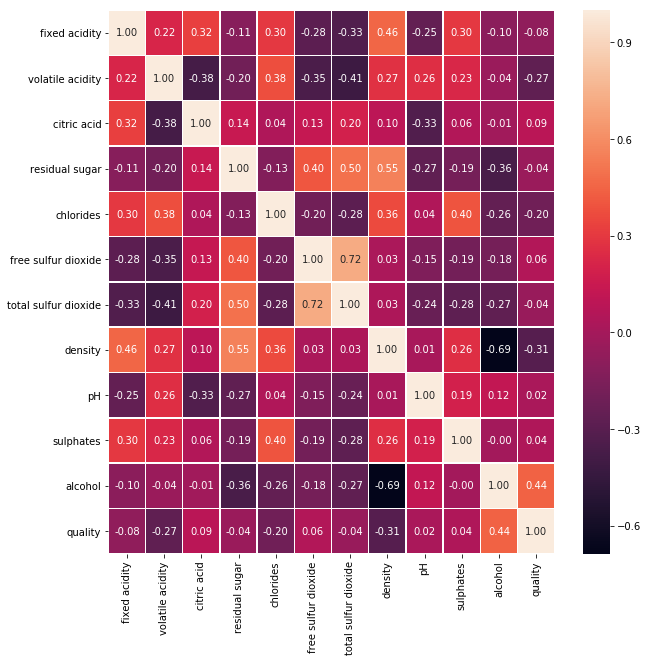

In [13]:
data = data_wine.drop(['code','rank'],axis =1)
data.corr() 
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(data.corr(), annot = True, linewidths=.5, fmt = ".2f", ax=ax)
plt.show()

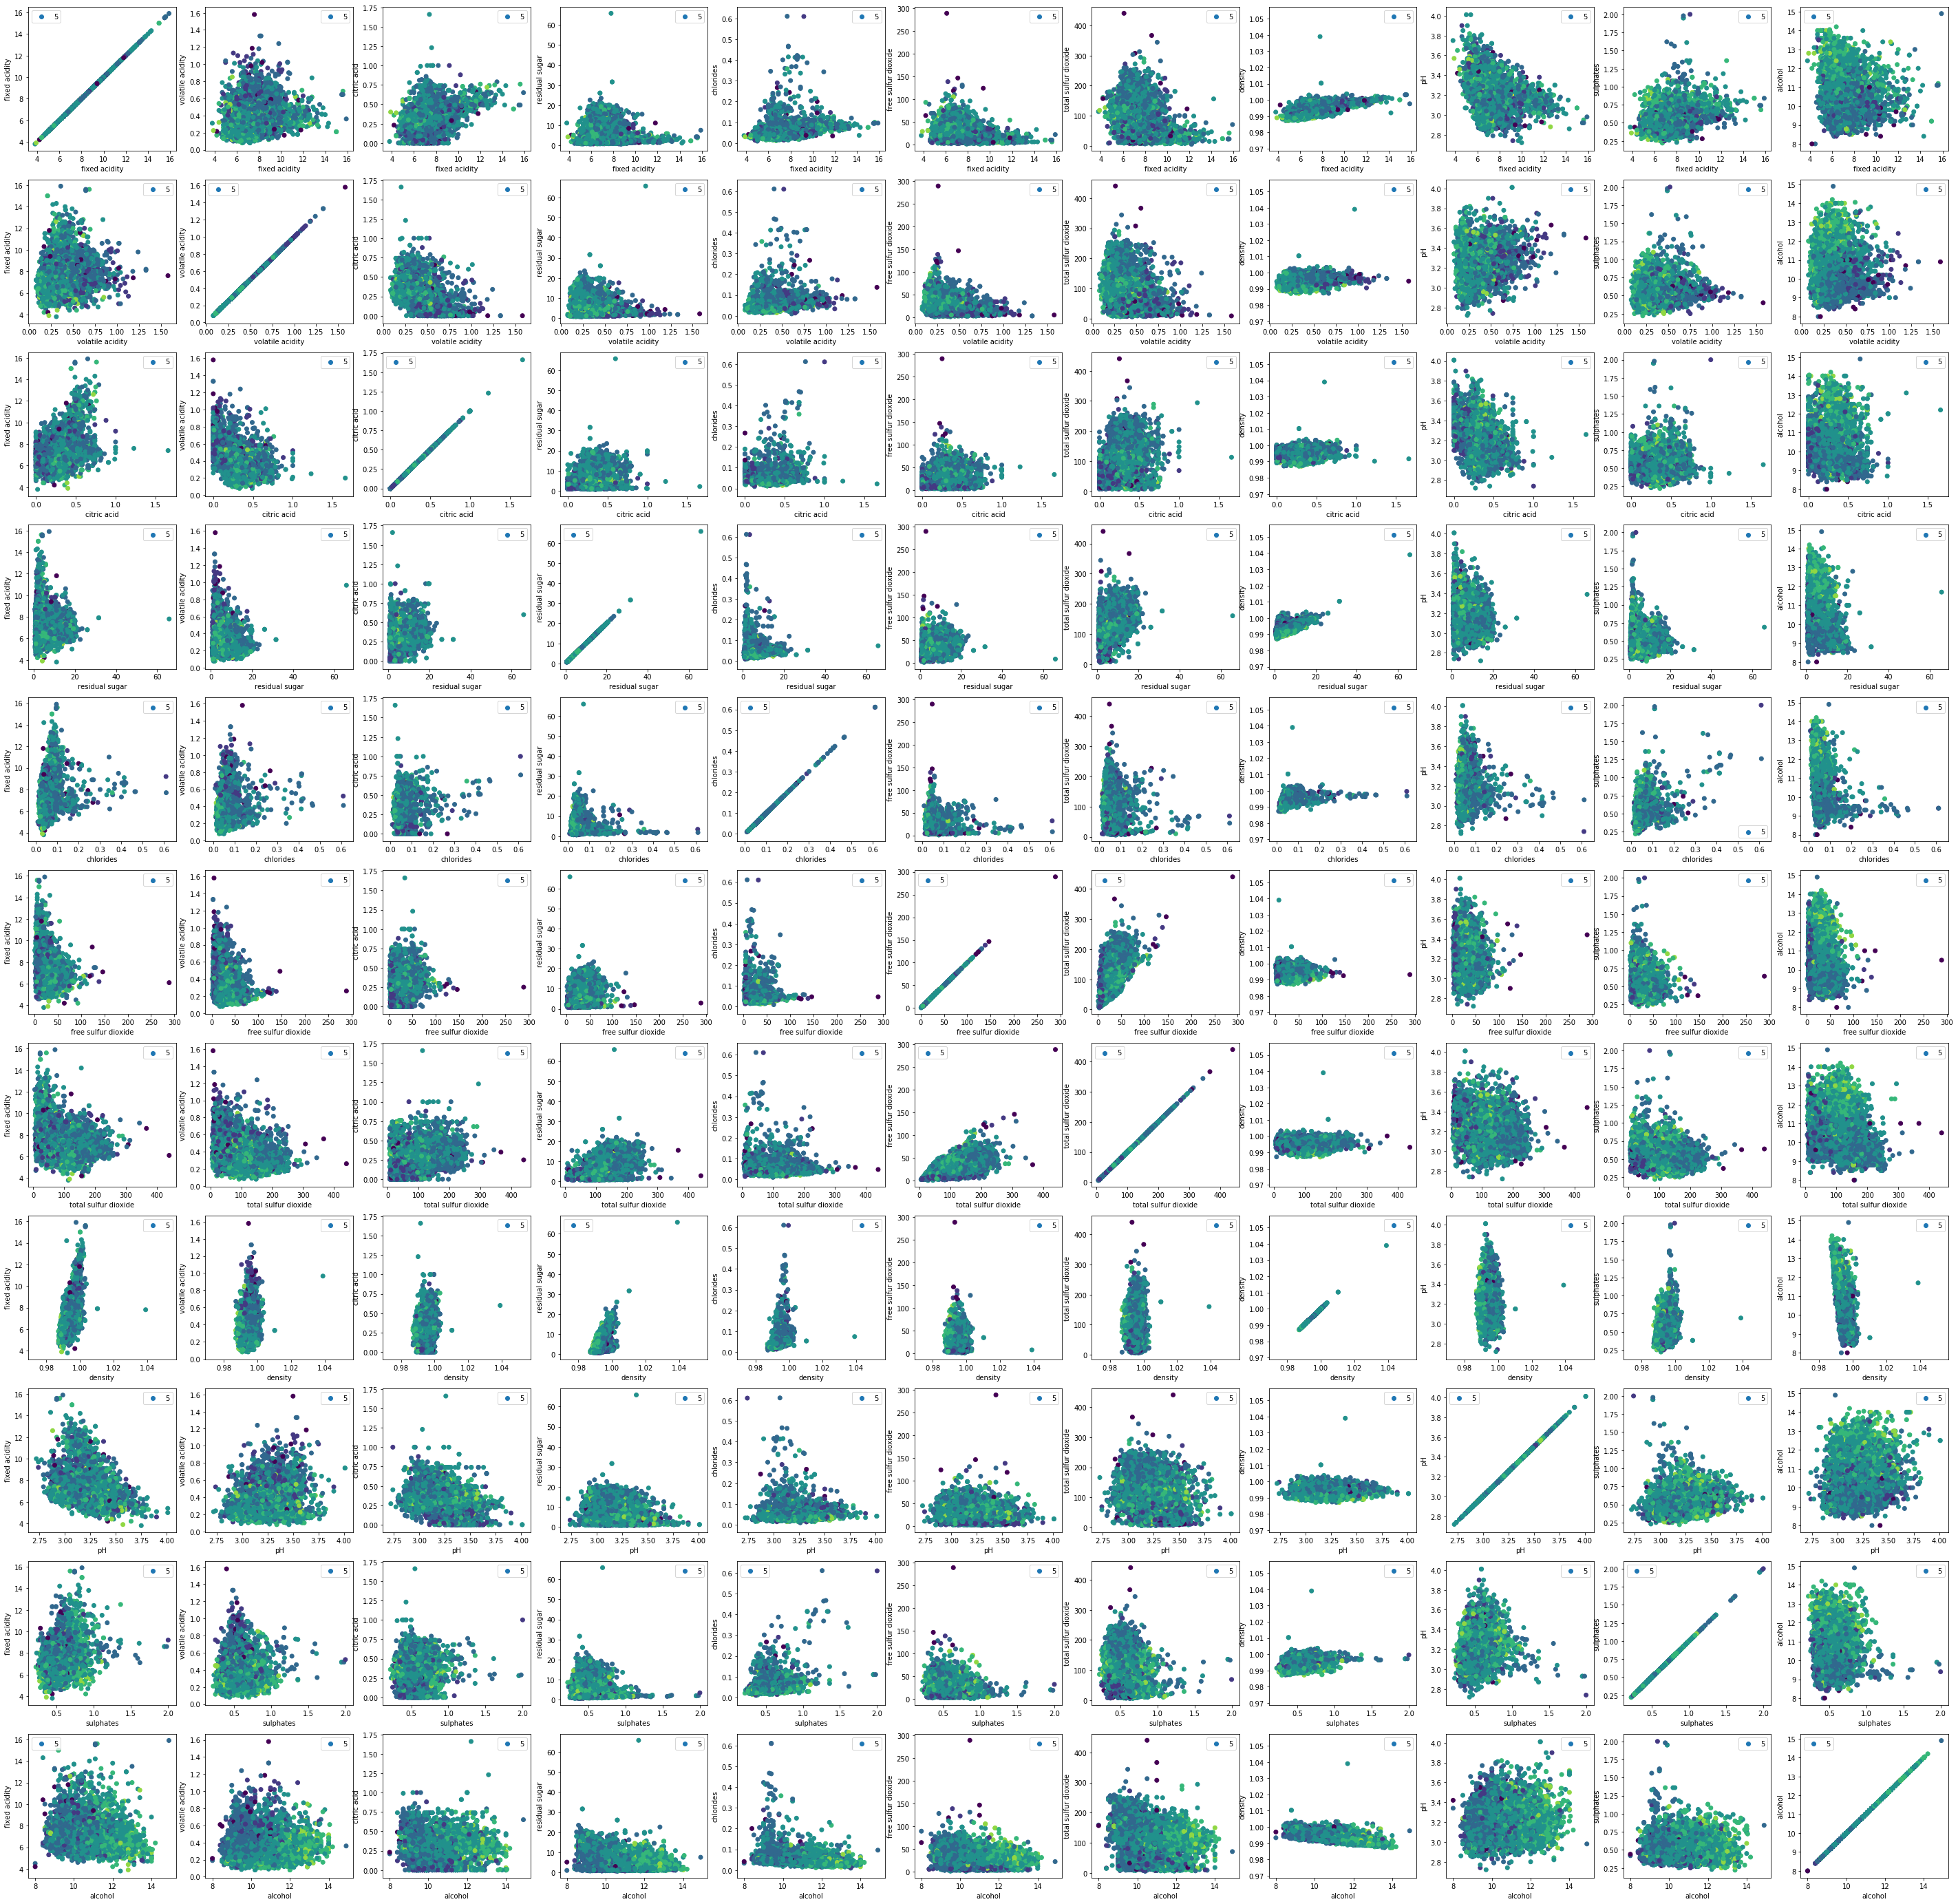

In [14]:
# Scatter chart 
fig, axes = plt.subplots(11,11,figsize = (50,50))
for i in range(11):
    for j in range(11):
        axes[i,j].scatter(data.iloc[:,i],data.iloc[:,j],c = data.quality)
        axes[i,j].set_xlabel(data.columns[i])
        axes[i,j].set_ylabel(data.columns[j])
        axes[i,j].legend(data.quality)
plt.show()

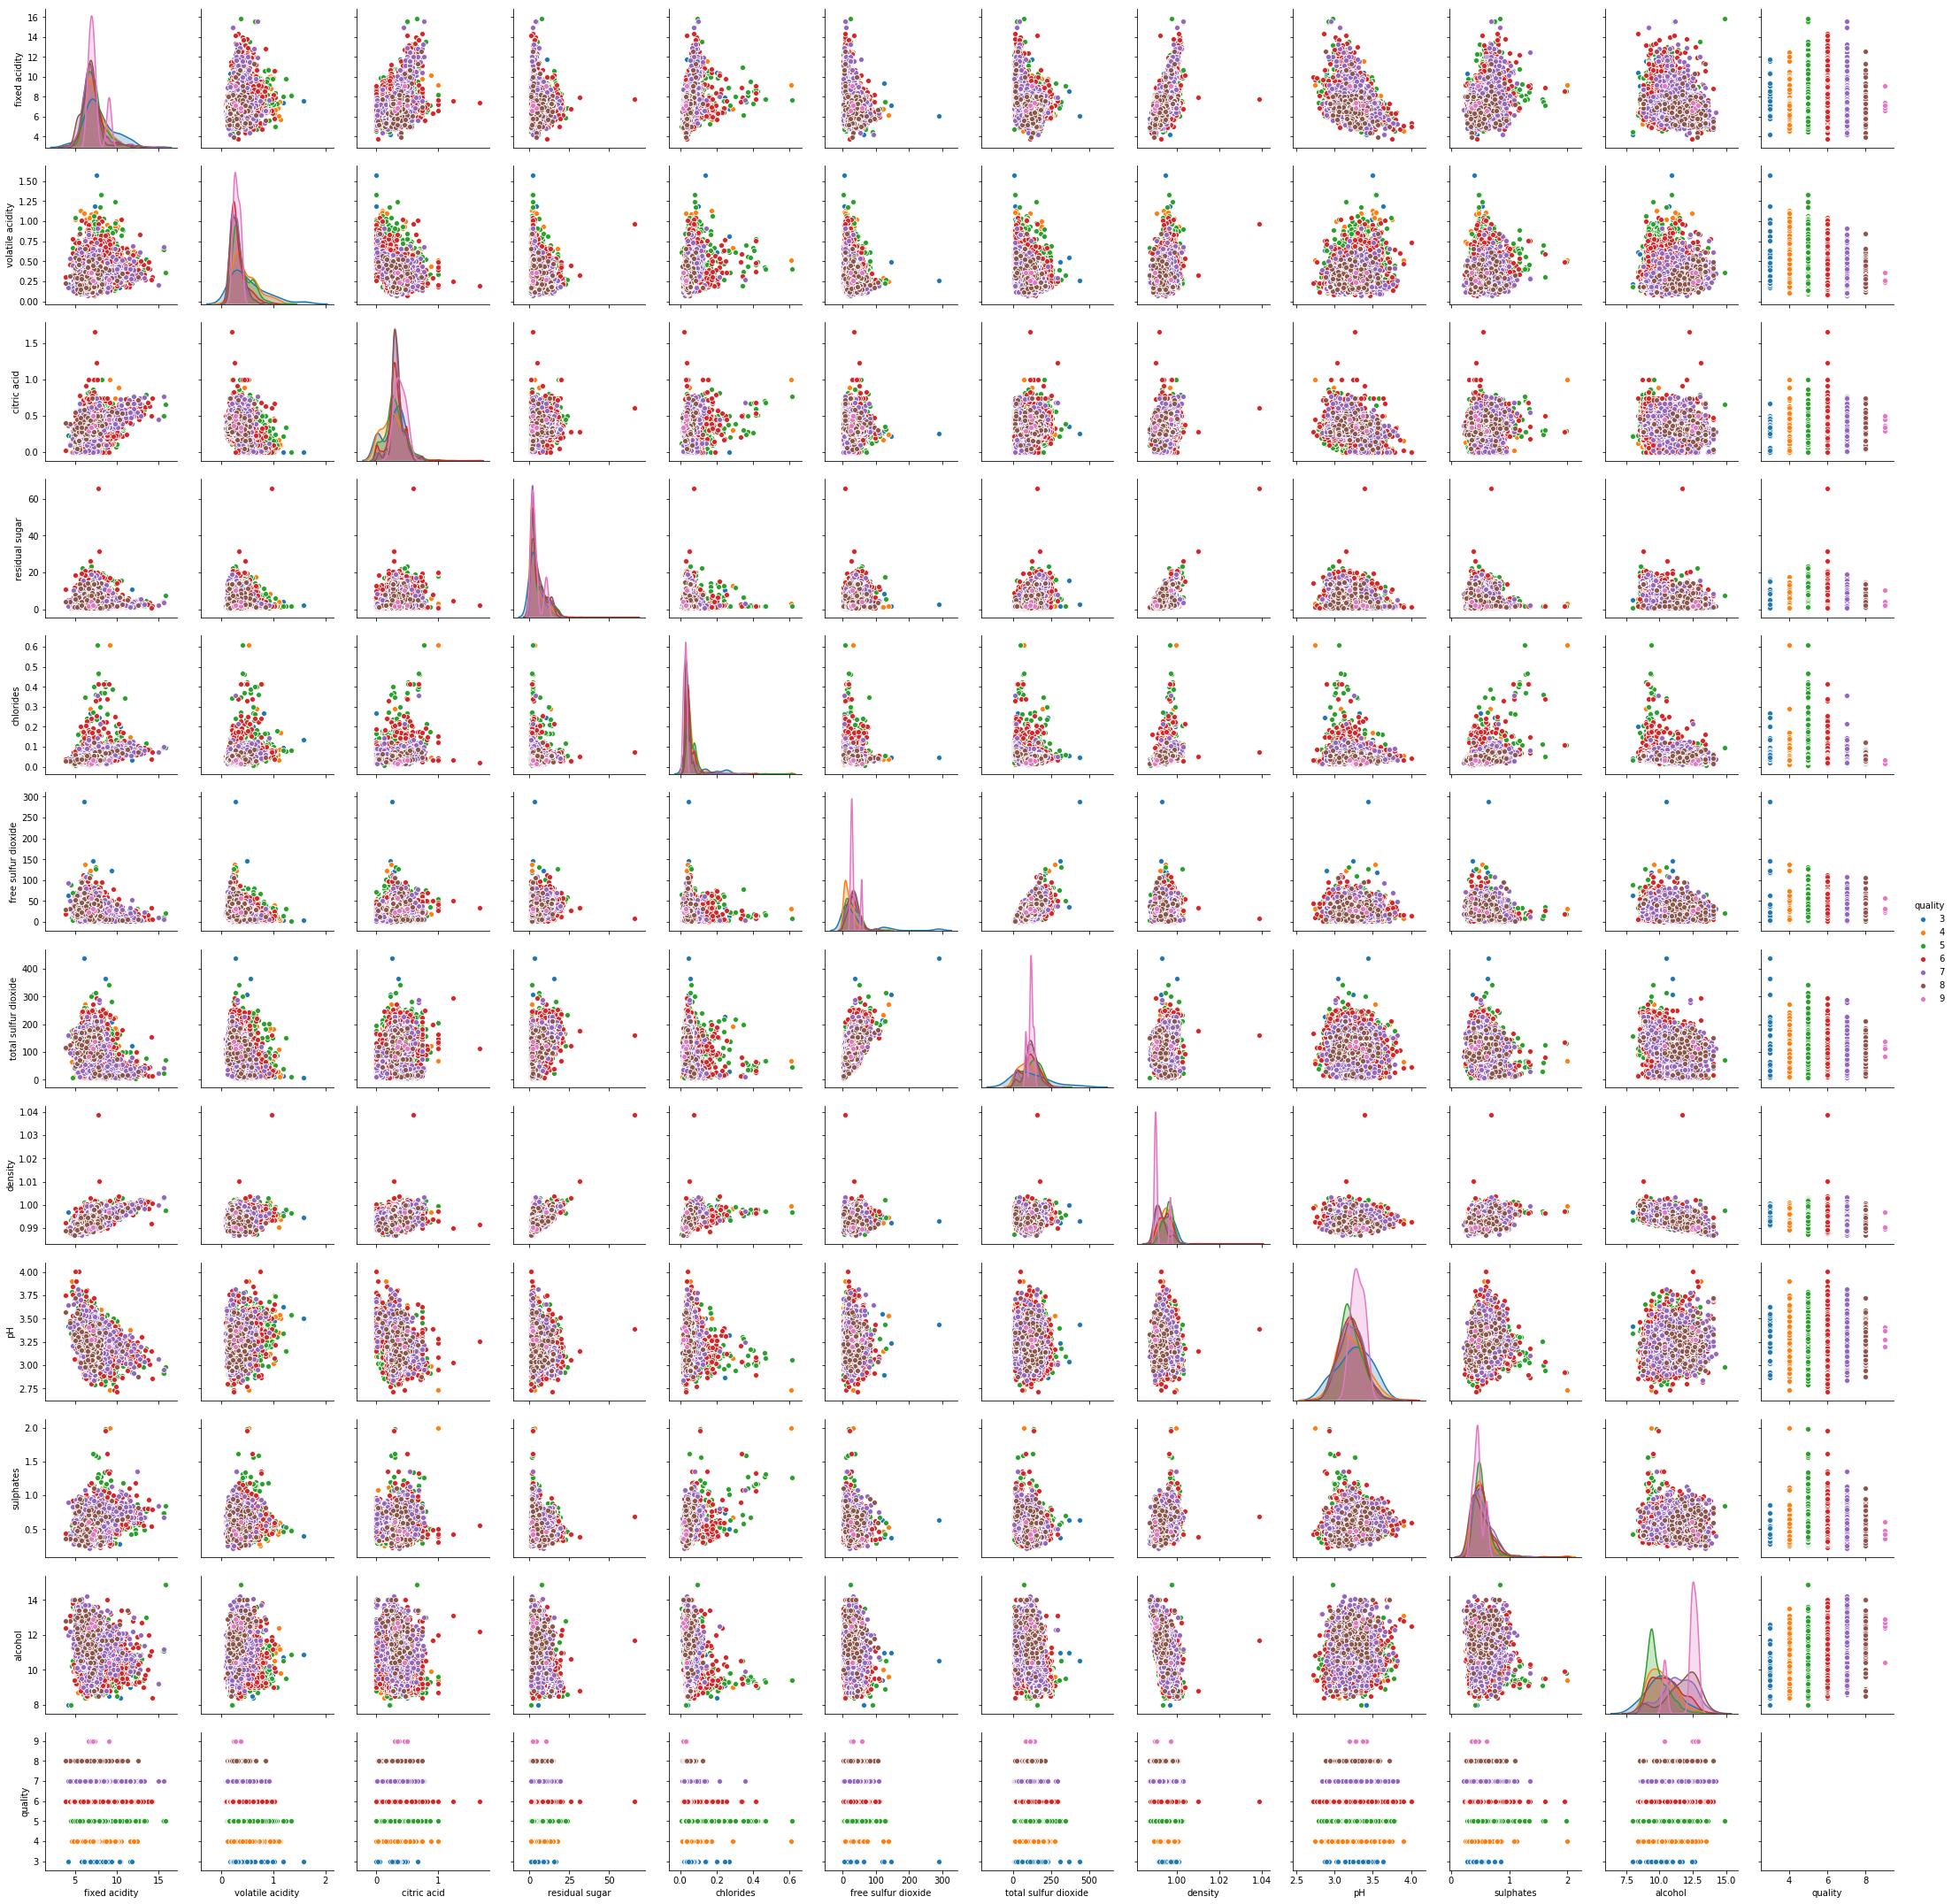

In [15]:
g = sns.pairplot(data, hue="quality")

In [16]:
# The number of sample on each class quality
data_wine.groupby('quality').size()

quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
dtype: int64

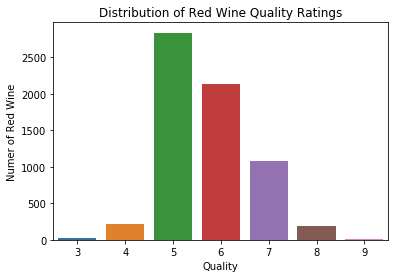

In [17]:
# Distribution of quality feature
sns.barplot(data['quality'].unique(),data['quality'].value_counts())
plt.xlabel('Quality')
plt.ylabel('Numer of Red Wine')
plt.title('Distribution of Red Wine Quality Ratings')
plt.show()

### Finding that the dataset is imbalance. The large of sample belong to two value: 5, 6.

In [18]:
# Information
data.describe(include = 'all')

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

### 3.2 Handle the Missing Values and Outlier Values

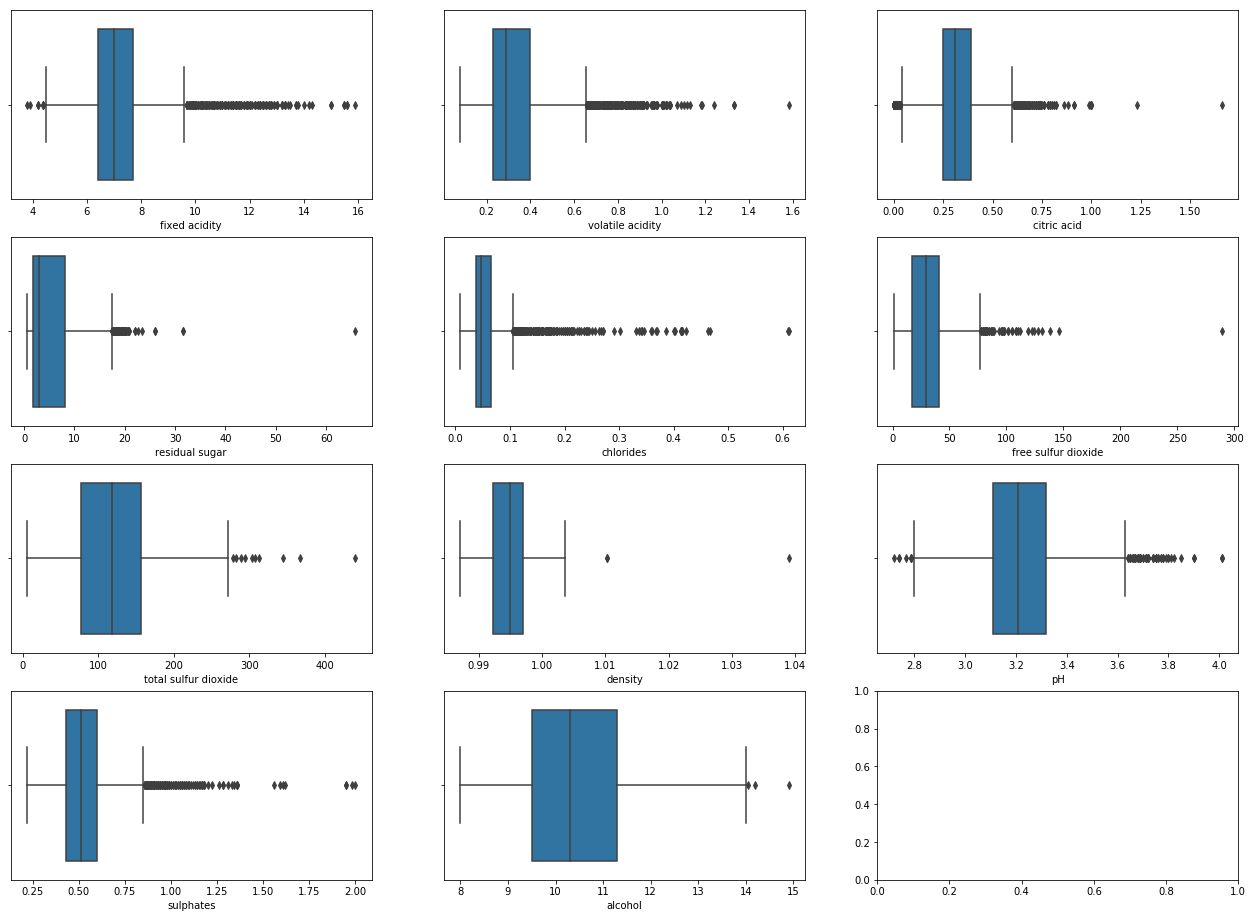

In [19]:
# Check the outliers for all features
fig, ax1 = plt.subplots(4,3,figsize=(22,16))
k = 0
for i in range(4):
    #print(i)
    for j in range(3):
        #print(j)
        if k!= 11:
            sns.boxplot(data.iloc[:,k],data = data, ax =ax1[i][j])
            k +=1
plt.show()

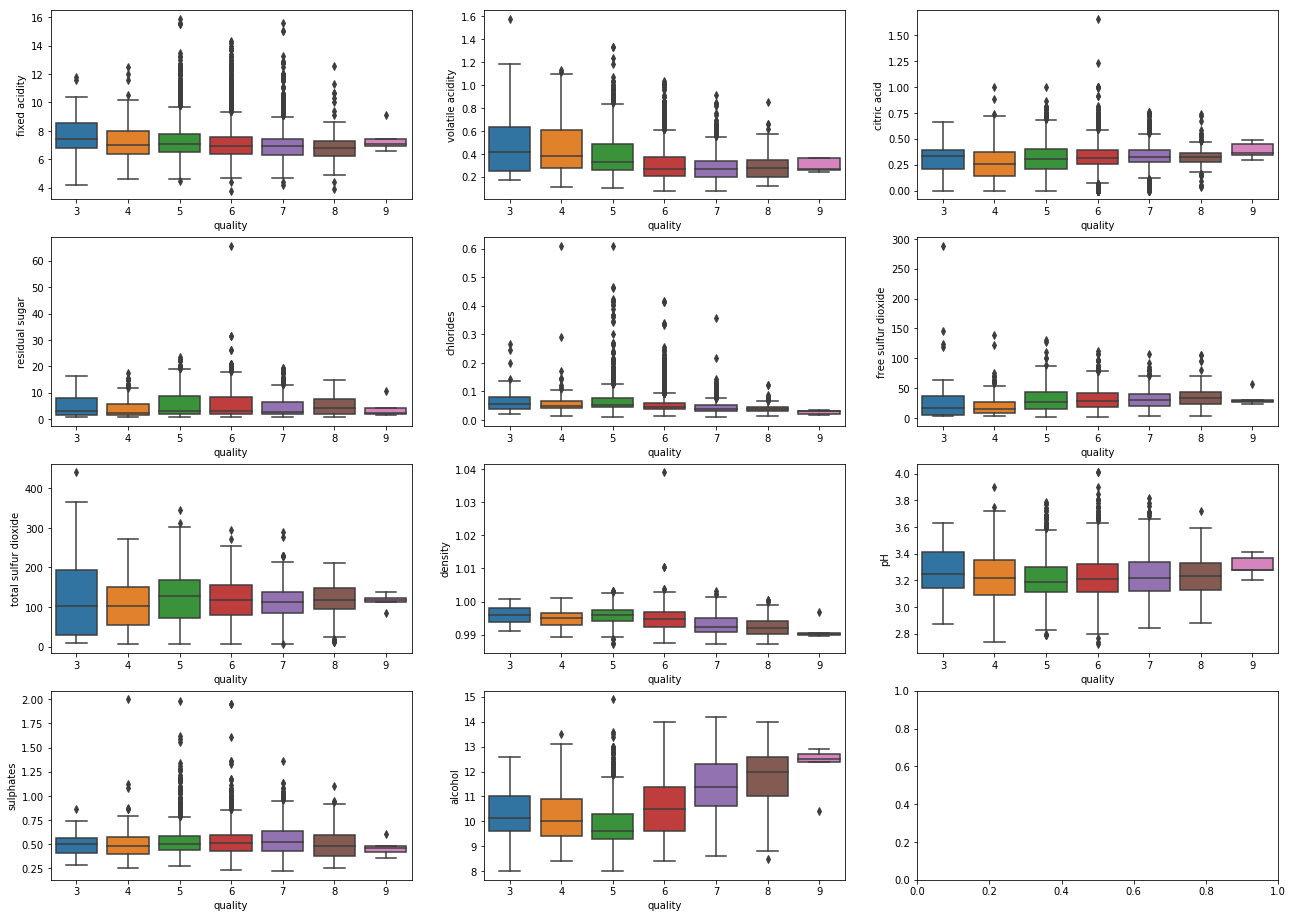

In [20]:
fig, ax1 = plt.subplots(4,3,figsize=(22,16))
k = 0
for i in range(4):
    #print(i)
    for j in range(3):
        #print(j)
        if k!= 11:
            sns.boxplot('quality',data.iloc[:,k],data = data, ax =ax1[i][j])
            k +=1
plt.show()

In [21]:
# The reason causes outliers?-> Solution (deleting, imputing, treat separately)
# 

In [22]:
# Function remove outliers
def removeOutliers(x, outlierConstant):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    
    result = a[np.where((a >= quartileSet[0]) & (a <= quartileSet[1]))]
    return result.tolist()

In [23]:
name_col = data.columns

6140


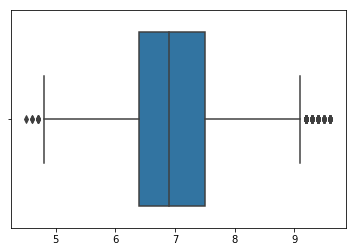

In [24]:
# fixed acidity
fixed_acidity = removeOutliers(data['fixed acidity'],1.5)
print(len(fixed_acidity))
sns.boxplot(fixed_acidity)

6120


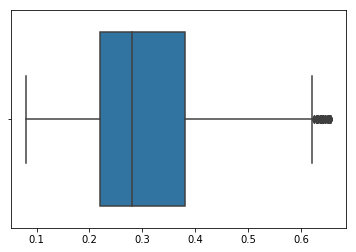

In [25]:
# volatile acidity
volatile_acidity = removeOutliers(data['volatile acidity'],1.5)
print(len(volatile_acidity))
sns.boxplot(volatile_acidity)

5988


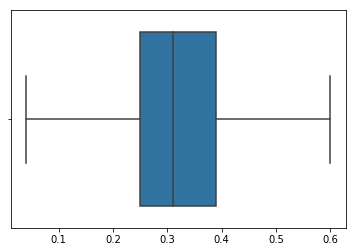

In [26]:
# citric acid
citric_acid = removeOutliers(data['citric acid'],1.5)
print(len(citric_acid))
sns.boxplot(citric_acid)

6379


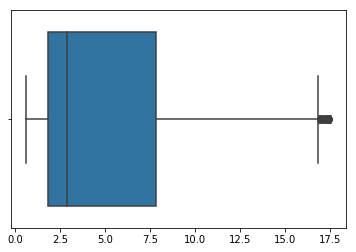

In [27]:
# residual sugar
residual_sugar = removeOutliers(data['residual sugar'],1.5)
print(len(residual_sugar))
sns.boxplot(residual_sugar)

6211


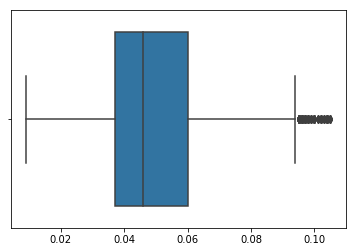

In [28]:
# chlorides
chlorides_af = removeOutliers(data['chlorides'],1.5)
print(len(chlorides_af))
sns.boxplot(chlorides_af)

6435


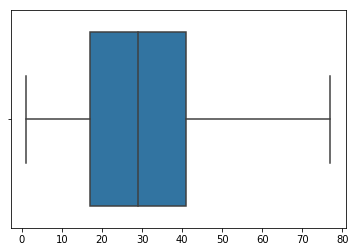

In [29]:
# free sulfur dioxide
free_sul_dioxide = removeOutliers(data['free sulfur dioxide'],1.5)
print(len(free_sul_dioxide))
sns.boxplot(free_sul_dioxide)

6487


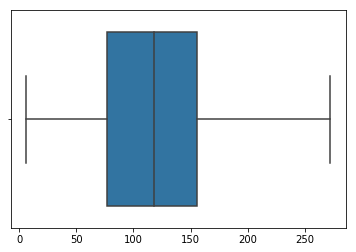

In [30]:
# total sulfur dioxide
sulfur_dioxide = removeOutliers(data['total sulfur dioxide'],1.5)
print(len(sulfur_dioxide))
sns.boxplot(sulfur_dioxide)

6494


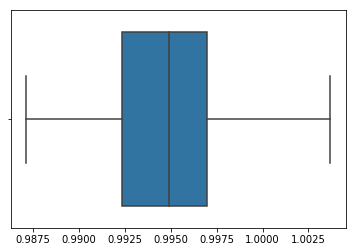

In [31]:
# density
density_af = removeOutliers(data['density'],1.5)
print(len(density_af))
sns.boxplot(density_af)

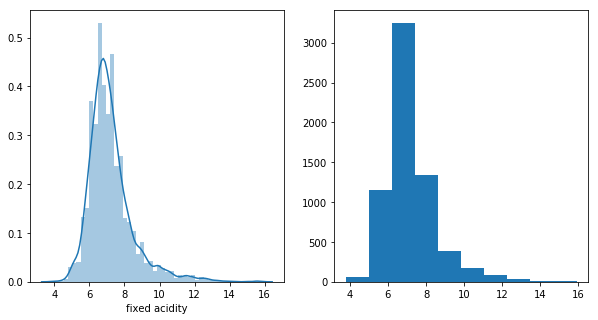

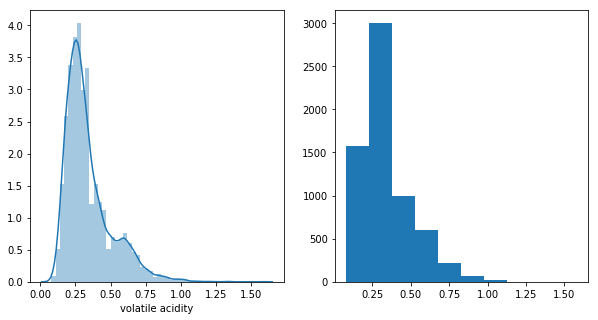

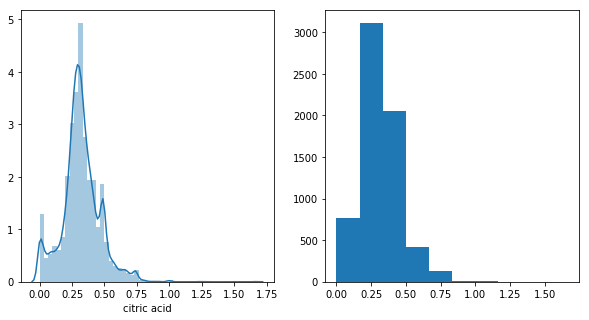

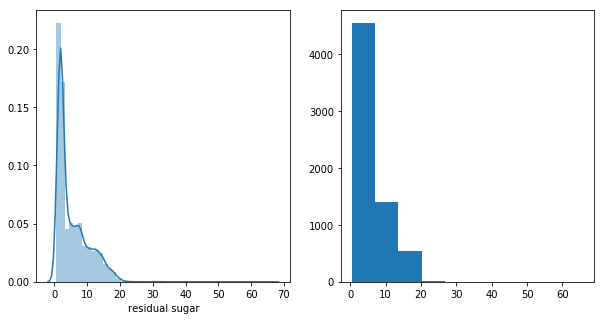

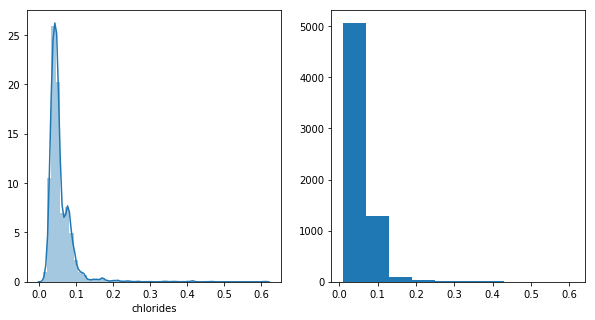

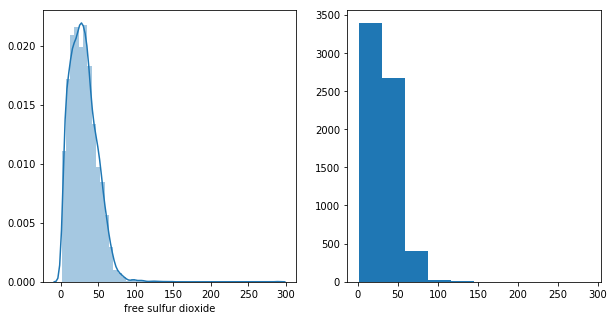

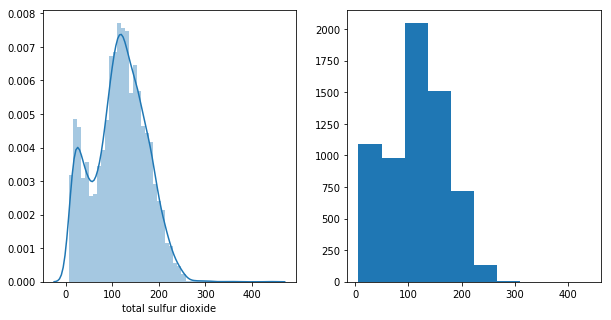

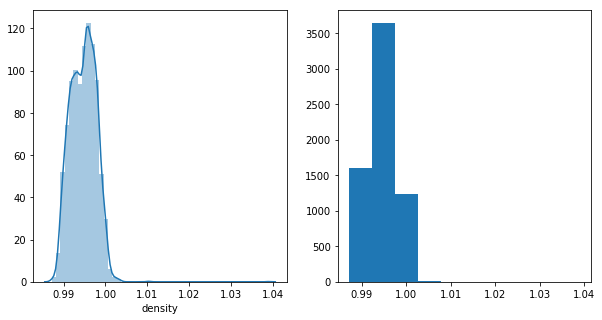

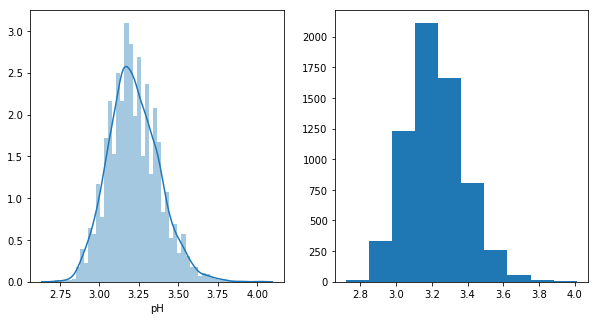

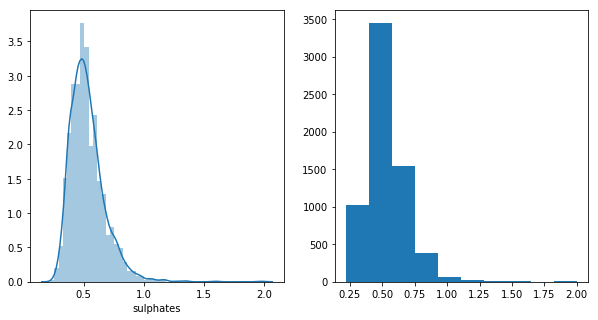

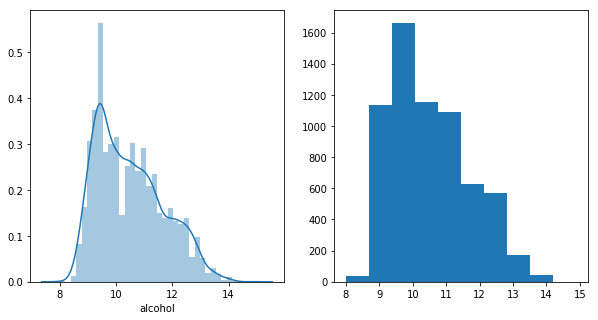

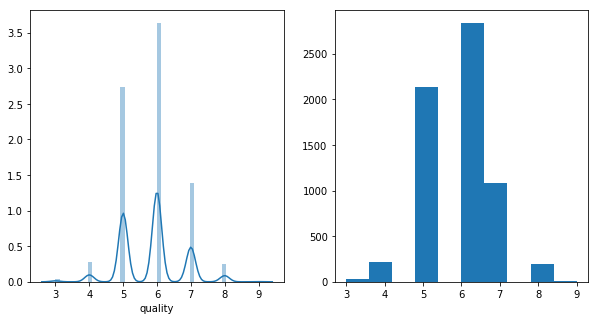

In [32]:
for i in name_col:
    #print('The number of',i,len(removeOutliers(data[i],1.5)))
    #print(type(removeOutliers(data[i],1.5)))
    #data[i]=removeOutliers(data[i],1.5)
    # Histogram
    plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    sns.distplot(data[i])
    plt.subplot(1,2,2)
    plt.hist(data[i])
plt.show()

In [33]:
# for i in name_col:
#     print('The min value of',i,'is',data[i].min())
#     print('The max value of',i,'is',data[i].max())
#     print("------------------------------------------")

In [34]:
# for i in name_col:
#     print('The skewness value of',i,'is',data[i].skew())
# #     print('The max value of',i,'is',data[i].max())
#     print("------------------------------------------")

### Feature selection

### Normalize Data

In [35]:
 #Tree-Parzen

# 4. Classification

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import graphviz  
from sklearn.externals.six import StringIO
from IPython.display import Image 

c:\python\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [37]:
#Normalization ==> x_norm = (x - mean)/std 
#it gives for each value the same value intervals means between 0-1
def normalization(X):
    mean = np.mean(X)
    std = np.std(X)
    X_t = (X - mean)/std
    return X_t

In [38]:
#Train and Test splitting of data     
def train_test(X_t, y):
    x_train, x_test, y_train, y_test = train_test_split(X_t, y, test_size = 0.2, random_state = 42)
    print("Train:",len(x_train), " - Test:", len(x_test))
    return x_train, x_test, y_train, y_test

##  Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report

In [40]:
# Input data
X = data_wine.drop(['quality','rank'], axis =1)
# Target
y = data_wine['rank']

In [41]:
#Normalization
X_t = normalization(X)
print('X_t:', X_t.shape)
# Train and Test splitting of data
x_train, x_test, y_train, y_test = train_test(X_t,y)

X_t: (6497, 12)
Train: 5197  - Test: 1300


### Logistic Regression 

In [43]:
### Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
#Traning score
lr.score(x_train,y_train)

0.7823744467962286

In [45]:
y_o_pred = lr.predict(x_test)
accuracy_score(y_test,y_o_pred)

0.7953846153846154

In [46]:
# Evaluation
conf_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_o_pred)
print("confusion matrix:\n", conf_matrix)

confusion matrix:
 [[  0  48   1]
 [  0 962  37]
 [  0 180  72]]


In [47]:
#Print classification report using predictions
print(classification_report(y_test, y_o_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.81      0.96      0.88       999
           2       0.65      0.29      0.40       252

    accuracy                           0.80      1300
   macro avg       0.49      0.42      0.43      1300
weighted avg       0.75      0.80      0.75      1300



### Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
### Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
#Predict the test data as selected classifier
rf_pred = rf.predict(x_test)
print('Random Forest:', accuracy_score(y_test, rf_pred)*100,'%')
clf1_accuracy = sum(y_test == rf_pred)/len(y_test)
print("Accuracy of Random Forest Classifier:",clf1_accuracy*100)

Random Forest: 86.15384615384616 %
Accuracy of Random Forest Classifier: 86.15384615384616


In [52]:
# Print confusion matrix and accuracy score 
clf1_conf_matrix = confusion_matrix(y_test, rf_pred)
print("Confusion matrix of random forest:\n", clf1_conf_matrix)
print("==========================================")

Confusion matrix of random forest:
 [[  8  39   2]
 [  0 967  32]
 [  0 107 145]]


### Logistic Regression with GridSearchCV

In [53]:
lr_2 = LogisticRegression()
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(x_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_
print("Best Parameters for Logistic Regression: ", grid_log_reg.best_estimator_)
print("Best Score for Logistic Regression: ", grid_log_reg.best_score_)

Best Parameters for Logistic Regression:  LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Best Score for Logistic Regression:  0.7814123532807389


In [54]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#plot_learning_curve(grid_clf, name_clf, x_train, y_train, ylim=(0.1, 1.01), cv=cv, n_jobs=4)
    
#Apply cross validation to estimate the skills of models with 10 split with using best parameters
scores = cross_val_score(log_reg, x_train, y_train, cv=10)
print("Mean Accuracy of Cross Validation: %", round(scores.mean()*100,2))
print("Std of Accuracy of Cross Validation: %", round(scores.std()*100))
print("------------------------------------------")
    
#Predict the test data as selected classifier
clf_prediction = log_reg.predict(x_test)
clf1_accuracy = sum(y_test == clf_prediction)/len(y_test)
print("Accuracy of",log_reg,":",clf1_accuracy*100)
    
#print confusion matrix and accuracy score before best parameters
clf1_conf_matrix = confusion_matrix(y_test, clf_prediction)
print("Confusion matrix of",log_reg,":\n", clf1_conf_matrix)
print("==========================================")

Mean Accuracy of Cross Validation: % 78.18
Std of Accuracy of Cross Validation: % 1.0
------------------------------------------
Accuracy of LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) : 79.46153846153847
Confusion matrix of LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) :
 [[  0  48   1]
 [  0 965  34]
 [  0 184  68]]


### Random Forest Classifier with GridSearchCV

Best Parameters for Random Forest:  RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Best Score for Random Forest:  0.8141235328073889
------------------------------------------


<BarContainer object of 12 artists>

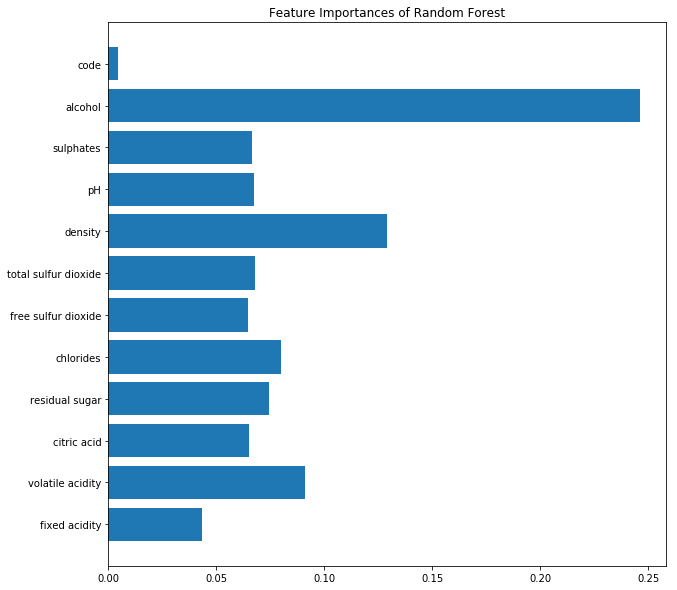

In [55]:
forest_params = {"bootstrap":[True, False], "max_depth": list(range(2,10,1)), 
                  "min_samples_leaf": list(range(5,20,1))}
grid_forest = GridSearchCV(RandomForestClassifier(n_estimators=100), forest_params)
grid_forest.fit(x_train, y_train)
# forest best estimator
forest_clf = grid_forest.best_estimator_
print("Best Parameters for Random Forest: ", grid_forest.best_estimator_)
print("Best Score for Random Forest: ", grid_forest.best_score_)
print("------------------------------------------")
        
#FEATURE IMPORTANCE FOR DECISION TREE
importnce = forest_clf.feature_importances_
plt.figure(figsize=(10,10))
plt.title("Feature Importances of Random Forest")
plt.barh(X_t.columns, importnce, align="center")

In [56]:
#Apply cross validation to estimate the skills of models with 10 split with using best parameters
scores = cross_val_score(forest_clf, x_train, y_train, cv=10)
print("Mean Accuracy of Cross Validation: %", round(scores.mean()*100,2))
print("Std of Accuracy of Cross Validation: %", round(scores.std()*100))
print("------------------------------------------")
    
#Predict the test data as selected classifier
clf_prediction = forest_clf.predict(x_test)
clf1_accuracy = sum(y_test == clf_prediction)/len(y_test)
print("Accuracy of",forest_clf,":",clf1_accuracy*100)
    
#print confusion matrix and accuracy score before best parameters
clf1_conf_matrix = confusion_matrix(y_test, clf_prediction)
print("Confusion matrix of",forest_clf,":\n", clf1_conf_matrix)
print("==========================================")

Mean Accuracy of Cross Validation: % 81.74
Std of Accuracy of Cross Validation: % 1.0
------------------------------------------
Accuracy of RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) : 81.92307692307692
Confusion matrix of RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fr